In [3]:
import urllib.request
import pandas as pd
import zipfile
import networkx as nx
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon

In [2]:
# Taken from:

#other options for mapping
#health layers - Trust, GP practices, Dentists? 
#effciency 


###-----datasets 
#Libraries 
#Data Sources
#Layers
#Efficiency
#Borders
#visulations
#Use-Cases


#read: https://osmnx.readthedocs.io/en/stable/index.html
# https://towardsdatascience.com/how-to-calculate-travel-time-for-any-location-in-the-world-56ce639511f
# https://hub.mybinder.turing.ac.uk/user/shakasom-isochronewithosmnx-orjzja61/notebooks/Isochrones.ipynb
# https://towardsdatascience.com/finding-time-dependent-travel-times-between-every-pair-of-locations-in-manhattan-c3c48b0db7ba
# https://max-coding.medium.com/osmnx-part-2-creating-driving-time-heatmap-718b3e59b81
#https://stackoverflow.com/questions/69678264/travel-time-map-to-closest-point-using-osmnx


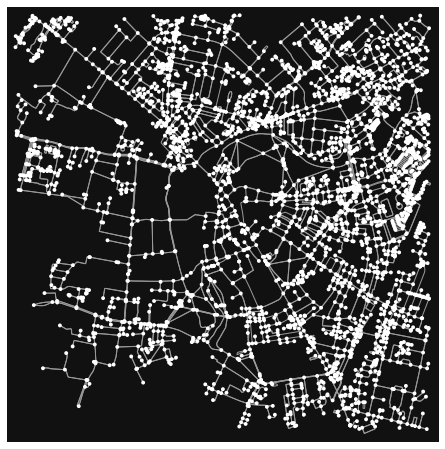

In [31]:
#Intial dev:
place = "Cambridge, England"
mode = "bike"
G = ox.graph_from_address(place, dist = 2000, simplify=True, network_type=mode)
fig, ax = ox.plot_graph(G);
plt.show()



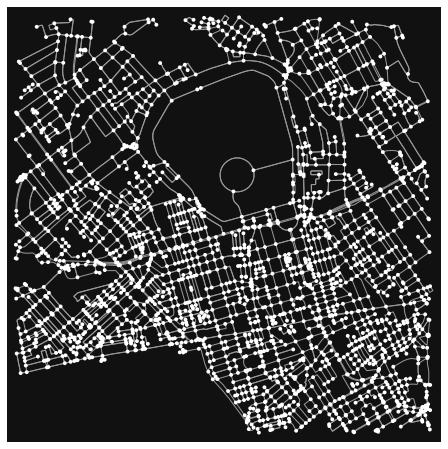

In [18]:

# 1. Place you are interested
place = "Marylebone, England"
# 2. Transportation mode
mode = "drive"
# 3. Create network graph from place and mode
G = ox.graph_from_address(place, dist = 2000, simplify=True, network_type=mode)
# 4. Plot the network graph
fig, ax = ox.plot_graph(G);
plt.show()

In [52]:
# Trip time in Mintues


# walking speed in km/hour
#travel_speed = 4.5

# add an edge attribute for time in minutes required to traverse each edge
#meters_per_minute = travel_speed * 1000 / 60 #km per hour to m per minute
#for u, v, k, data in G.edges(data=True, keys=True):
    #data['time'] = data['length'] / meters_per_minute

In [19]:
# node map centred on The City Centre Medical Practice - Cambridge
#----- loop to generate all points of intrest from EPRACURR
point_of_interest = ox.distance.nearest_nodes(G, X =-0.142450, Y=51.525660) # X = longitude, Y = Latitude


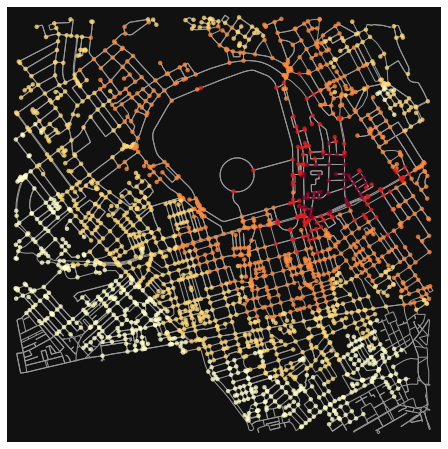

In [25]:
trip_times = [5, 10, 20, 30, 40]
# 1 - get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='YlOrRd', return_hex=True)
# 2 - color the nodes according to isochrone then plot the street network
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(G, point_of_interest, radius=trip_time)
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in G.nodes()]
ns = [20 if node in node_colors else 0 for node in G.nodes()]
fig, ax = ox.plot.plot_graph(G, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2)


In [26]:
# make the isochrone polygons
isochrone_polys = []
for trip_time in sorted(trip_times, reverse=True):
    subgraph = nx.ego_graph(G, point_of_interest, radius=trip_time, distance='time')
    node_points = [Point((data['x'], data['y'])) for node, data in subgraph.nodes(data=True)]
    bounding_poly = gpd.GeoSeries(node_points).unary_union.convex_hull
    isochrone_polys.append(bounding_poly)

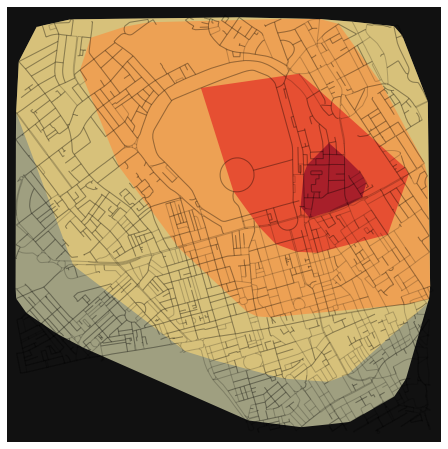

In [27]:
fig, ax = ox.plot.plot_graph(G, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

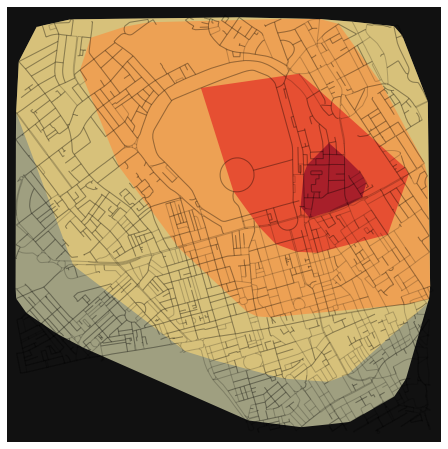

In [28]:
fig, ax = ox.plot.plot_graph(G, show=False, close=False, edge_color='k', edge_alpha=0.2, node_color='none')
for polygon, fc in zip(isochrone_polys, iso_colors):
    patch = PolygonPatch(polygon, fc=fc, ec='none', alpha=0.6, zorder=-1)
    ax.add_patch(patch)
plt.show()

,Organisation Code,Name,National Grouping,High Level Health Geography,Address line 1,Address line 2,Address line 3,Address line 4,Address line 5,Postcode,...,Contact Telephone Number,Null 1,Null 2,Null 3,Amended Record Indicator,Null 4,Provider/Purchaser,Null 5,Prescribing Setting,Null 6
0,A81001,THE DENSHAM SURGERY,Y63,QHM,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,NaN,TS18 1HU,...,01642 672351,NaN,NaN,NaN,0,NaN,16C,NaN,4,NaN
1,A81002,QUEENS PARK MEDICAL CENTRE,Y63,QHM,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,NaN,TS18 2AW,...,01642 679681,NaN,NaN,NaN,0,NaN,16C,NaN,4,NaN
2,A81003,VICTORIA MEDICAL PRACTICE,Y54,Q74,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,NaN,TS26 8DB,...,01429 272945,NaN,NaN,NaN,0,NaN,00K,NaN,4,NaN
3,A81004,ACKLAM MEDICAL CENTRE,Y63,QHM,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,CLEVELAND,NaN,TS5 8SB,...,01642 827697,NaN,NaN,NaN,0,NaN,16C,NaN,4,NaN
4,A81005,SPRINGWOOD SURGERY,Y63,QHM,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,NaN,TS14 7DJ,...,01287 619611,NaN,NaN,NaN,0,NaN,16C,NaN,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,Y07261,ORPINGTON PCN EXTENDED SERVICE,Y56,QKK,CHELSFIELD SURGERY,62 WINDSOR DRIVE,ORPINGTON,KENT,NaN,BR6 6HD,...,01689 852204,NaN,NaN,NaN,1,NaN,72Q,NaN,0,NaN
15056,Y07262,COVENTRY NORTH PCN EXTENDED HOURS,Y60,QWU,"UNIT 1, BOILER HOUSE",ELECTRIC WHARF,COVENTRY,NaN,NaN,CV1 4JU,...,024 7710980,NaN,NaN,NaN,1,NaN,B2M3M,NaN,0,NaN
15057,Y07263,COVENTRY CENTRAL PCN EXTENDED HOURS,Y60,QWU,"UNIT 1, BOILER HOUSE",ELECTRIC WHARF,COVENTRY,NaN,NaN,CV1 4JU,...,024 7710980,NaN,NaN,NaN,1,NaN,B2M3M,NaN,0,NaN
15058,Y07264,UNITY PCN EXTENDED HOURS,Y60,QWU,"UNIT 1, BOILER HOUSE",ELECTRIC WHARF,COVENTRY,NaN,NaN,CV1 4JU,...,024 7710980,NaN,NaN,NaN,1,NaN,B2M3M,NaN,0,NaN
